In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics  import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import  f1_score, precision_score, recall_score
from sklearn import tree
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,LSTM
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.models import load_model
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\User\juypter\files\weatherData123.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

<Axes: xlabel='RainTomorrow', ylabel='count'>

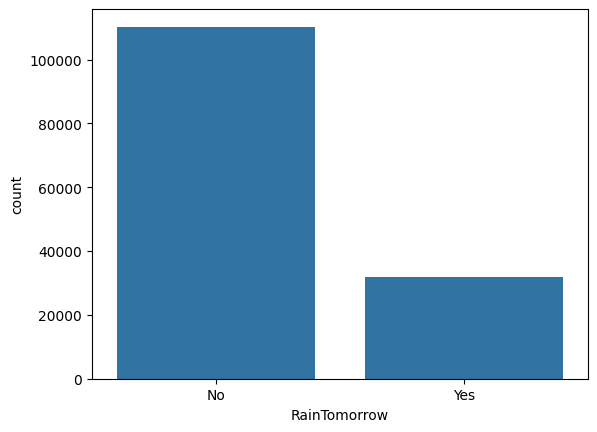

In [5]:
sns.countplot(x =data['RainTomorrow'])

In [6]:
float_columns = data.select_dtypes(include=['float64'])
print(float_columns.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')


In [9]:
data2 = float_columns
data2.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RISK_MM          float64
dtype: object

In [1]:
import polars as pl

df = pl.read_csv(r'C:\Users\User\juypter\Data analytics\food_data.csv')
df

ModuleNotFoundError: No module named 'polars'

In [10]:
data2.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2


<Axes: >

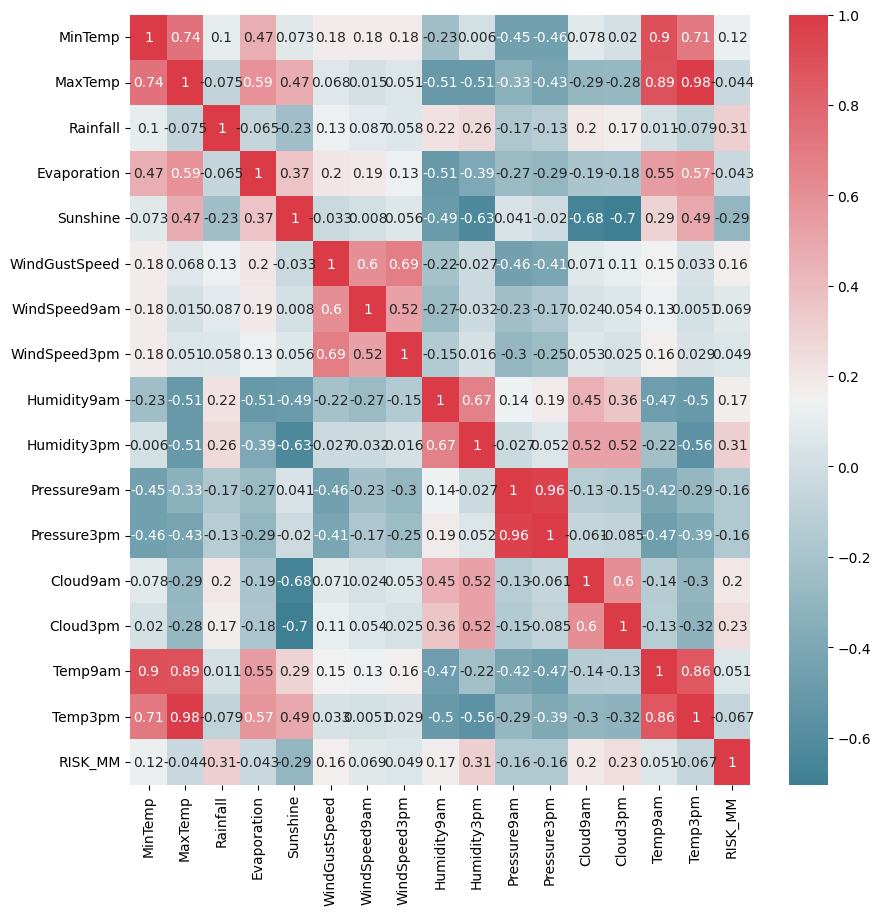

In [11]:
# correalation

import matplotlib.pyplot as plt
corr = data2.corr()
cormp = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True, annot=True, cmap=cormp)

In [12]:
data['Date']= pd.to_datetime(data['Date'])
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month

# use neural network use months into cyclic continious

def encode(data,col,max_val):
    data[col+'_sin'] = np.sin(2*np.pi*data[col]/max_val)
    data[col+'_cos'] = np.cos(2*np.pi*data[col]/max_val)
    return data

data['Month']=data.Date.dt.month
data = encode(data, 'Month', 12)

data['Day']=data.Date.dt.day
data = encode(data, 'Day',31)  
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainToday,RISK_MM,RainTomorrow,Year,Month,Month_sin,Month_cos,Day,Day_sin,Day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,No,0.0,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,No,0.0,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,No,0.0,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,No,1.0,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,No,0.2,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0.5, 0, 'Year')

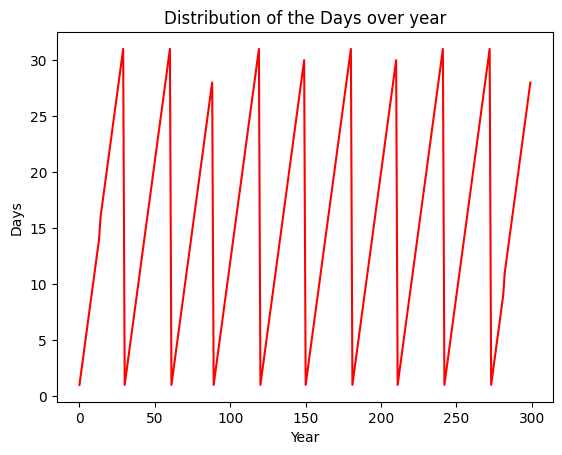

In [13]:
section = data[:300]
tm = section["Day"].plot(color='red')
tm.set_title("Distribution of the Days over year")
tm.set_ylabel("Days")
tm.set_xlabel("Year")


In [15]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'Year', 'Month',
       'Month_sin', 'Month_cos', 'Day', 'Day_sin', 'Day_cos'],
      dtype='object')

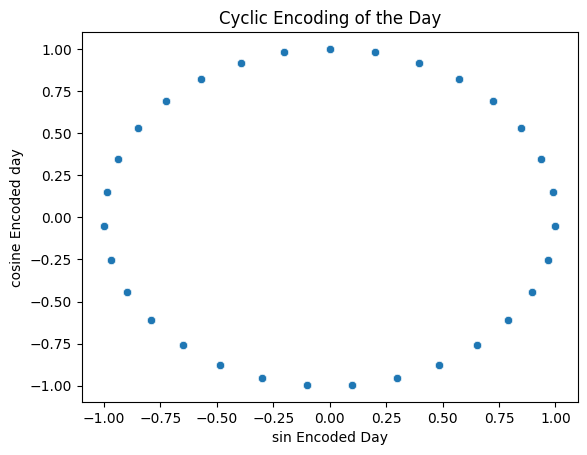

In [16]:
import matplotlib.pyplot as plt
c_months = sns.scatterplot(x = 'Day_sin',y = 'Day_cos',data=data)
c_months.set_title('Cyclic Encoding of the Day')
c_months.set_xlabel('sin Encoded Day')
c_months.set_ylabel('cosine Encoded day')
plt.show()

In [17]:
# get categorical values 
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)


Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [19]:
# check missing values
for a in object_cols:
    print(a, data[a].isnull().sum())

Location 0
WindGustDir 9330
WindDir9am 10013
WindDir3pm 3778
RainToday 1406
RainTomorrow 0


In [20]:
# fill missing values
for a in object_cols:
    data[a].fillna(data[a].mode()[0], inplace=True)

In [21]:
# get list of numeric values
s = (data.dtypes == 'float64')
float_Cols = list(s[s].index)
print("numeric variables:")
print(float_Cols)

numeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos']


In [23]:
# missing numeric null values 

for a in float_Cols:
    print(a,data[a].isnull().sum())

MinTemp 637
MaxTemp 322
Rainfall 1406
Evaporation 60843
Sunshine 67816
WindGustSpeed 9270
WindSpeed9am 1348
WindSpeed3pm 2630
Humidity9am 1774
Humidity3pm 3610
Pressure9am 14014
Pressure3pm 13981
Cloud9am 53657
Cloud3pm 57094
Temp9am 904
Temp3pm 2726
RISK_MM 0
Month_sin 0
Month_cos 0
Day_sin 0
Day_cos 0


In [25]:
# fill the missing values 

for i in float_Cols:
    data[i].fillna(data[i].median(),inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        142193 non-null  float64       
 3   MaxTemp        142193 non-null  float64       
 4   Rainfall       142193 non-null  float64       
 5   Evaporation    142193 non-null  float64       
 6   Sunshine       142193 non-null  float64       
 7   WindGustDir    142193 non-null  object        
 8   WindGustSpeed  142193 non-null  float64       
 9   WindDir9am     142193 non-null  object        
 10  WindDir3pm     142193 non-null  object        
 11  WindSpeed9am   142193 non-null  float64       
 12  WindSpeed3pm   142193 non-null  float64       
 13  Humidity9am    142193 non-null  float64       
 14  Humidity3pm    142193 non-null  float64       
 15  

In [27]:
data['year']=data['Year']
yearWise_Rainfall = data.groupby(['year'])['Rainfall'].sum().reset_index()
yearWise_Rainfall

,year,Rainfall
0,2007,196.4
1,2008,5141.2
2,2009,35652.5
3,2010,43828.6
4,2011,42163.4
5,2012,35825.5
6,2013,36108.3
7,2014,33603.3
8,2015,36492.7
9,2016,41154.5


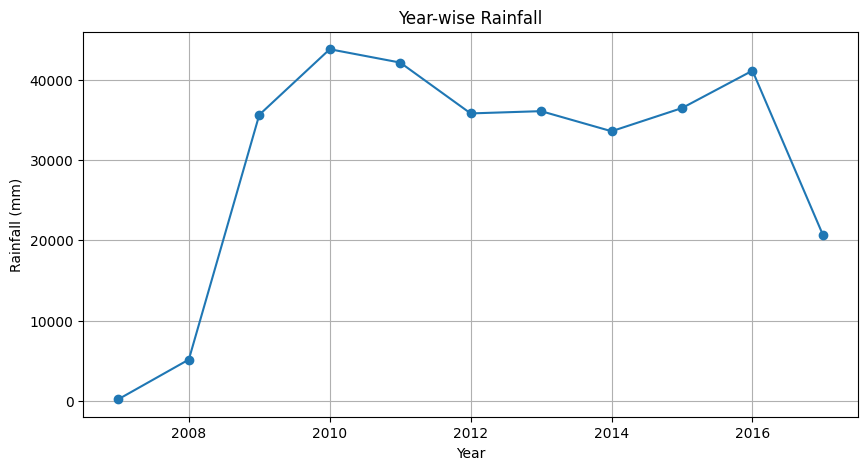

In [28]:
plt.figure(figsize=(10,5))
plt.plot(yearWise_Rainfall['year'],yearWise_Rainfall['Rainfall'],marker='o')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Year-wise Rainfall')
plt.grid(True)
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
# Apply label encoder to each column of a dataframe


label_encoder = LabelEncoder()

for i in object_cols:
    data[i] = LabelEncoder().fit_transform(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  int32         
 2   MinTemp        142193 non-null  float64       
 3   MaxTemp        142193 non-null  float64       
 4   Rainfall       142193 non-null  float64       
 5   Evaporation    142193 non-null  float64       
 6   Sunshine       142193 non-null  float64       
 7   WindGustDir    142193 non-null  int32         
 8   WindGustSpeed  142193 non-null  float64       
 9   WindDir9am     142193 non-null  int32         
 10  WindDir3pm     142193 non-null  int32         
 11  WindSpeed9am   142193 non-null  float64       
 12  WindSpeed3pm   142193 non-null  float64       
 13  Humidity9am    142193 non-null  float64       
 14  Humidity3pm    142193 non-null  float64       
 15  

In [30]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RISK_MM,RainTomorrow,Year,Month,Month_sin,Month_cos,Day,Day_sin,Day_cos,year
0,2008-12-01,2,13.4,22.9,0.6,4.8,8.5,13,44.0,13,...,0.0,0,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530,2008
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.5,14,44.0,6,...,0.0,0,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958,2008
2,2008-12-03,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,...,0.0,0,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763,2008
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,...,1.0,0,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967,2008
4,2008-12-05,2,17.5,32.3,1.0,4.8,8.5,13,41.0,1,...,0.2,0,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964,2008


In [31]:
# preparing attribute of scale the data

features = data.drop(['RainTomorrow','Date','Day','Month'],axis=1)
features.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month_sin,Month_cos,Day_sin,Day_cos,year
0,2,13.4,22.9,0.6,4.8,8.5,13,44.0,13,14,...,16.9,21.8,0,0.0,2008,-2.449294e-16,1.0,0.201299,0.979530,2008
1,2,7.4,25.1,0.0,4.8,8.5,14,44.0,6,15,...,17.2,24.3,0,0.0,2008,-2.449294e-16,1.0,0.394356,0.918958,2008
2,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,15,...,21.0,23.2,0,0.0,2008,-2.449294e-16,1.0,0.571268,0.820763,2008
3,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,0,...,18.1,26.5,0,1.0,2008,-2.449294e-16,1.0,0.724793,0.688967,2008
4,2,17.5,32.3,1.0,4.8,8.5,13,41.0,1,7,...,17.8,29.7,0,0.2,2008,-2.449294e-16,1.0,0.848644,0.528964,2008


In [32]:
from sklearn import preprocessing
target = StandardScaler()

# standard scaler for the features
col_names= list(features.columns)
std_scaler = preprocessing.StandardScaler()
features = std_scaler.fit_transform(features)

features = pd.DataFrame(features, columns=col_names)
features.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month_sin,Month_cos,Day_sin,Day_cos,year
0,-1.527004,0.190085,-0.045764,-0.204920,-0.120303,0.16528,1.052556,0.310479,1.328933,1.366277,...,-0.013238,0.018050,-0.532962,-0.278450,-1.872674,-0.015522,1.434209,0.279183,1.424824,-1.872674
1,-1.527004,-0.749042,0.263677,-0.276125,-0.120303,0.16528,1.265582,0.310479,-0.221571,1.586236,...,0.033114,0.381886,-0.532962,-0.278450,-1.872674,-0.015522,1.434209,0.549895,1.338386,-1.872674
2,-1.527004,0.111824,0.348070,-0.276125,-0.120303,0.16528,1.478609,0.462679,1.328933,1.586236,...,0.620242,0.221798,-0.532962,-0.278450,-1.872674,-0.015522,1.434209,0.797968,1.198260,-1.872674
3,-1.527004,-0.467304,0.671577,-0.276125,-0.120303,0.16528,-0.864683,-1.211523,0.442931,-1.713146,...,0.172171,0.702062,-0.532962,-0.160497,-1.872674,-0.015522,1.434209,1.013246,1.010182,-1.872674
4,-1.527004,0.831821,1.276393,-0.157450,-0.120303,0.16528,1.052556,0.082179,-1.329073,-0.173434,...,0.125818,1.167773,-0.532962,-0.254859,-1.872674,-0.015522,1.434209,1.186915,0.781853,-1.872674


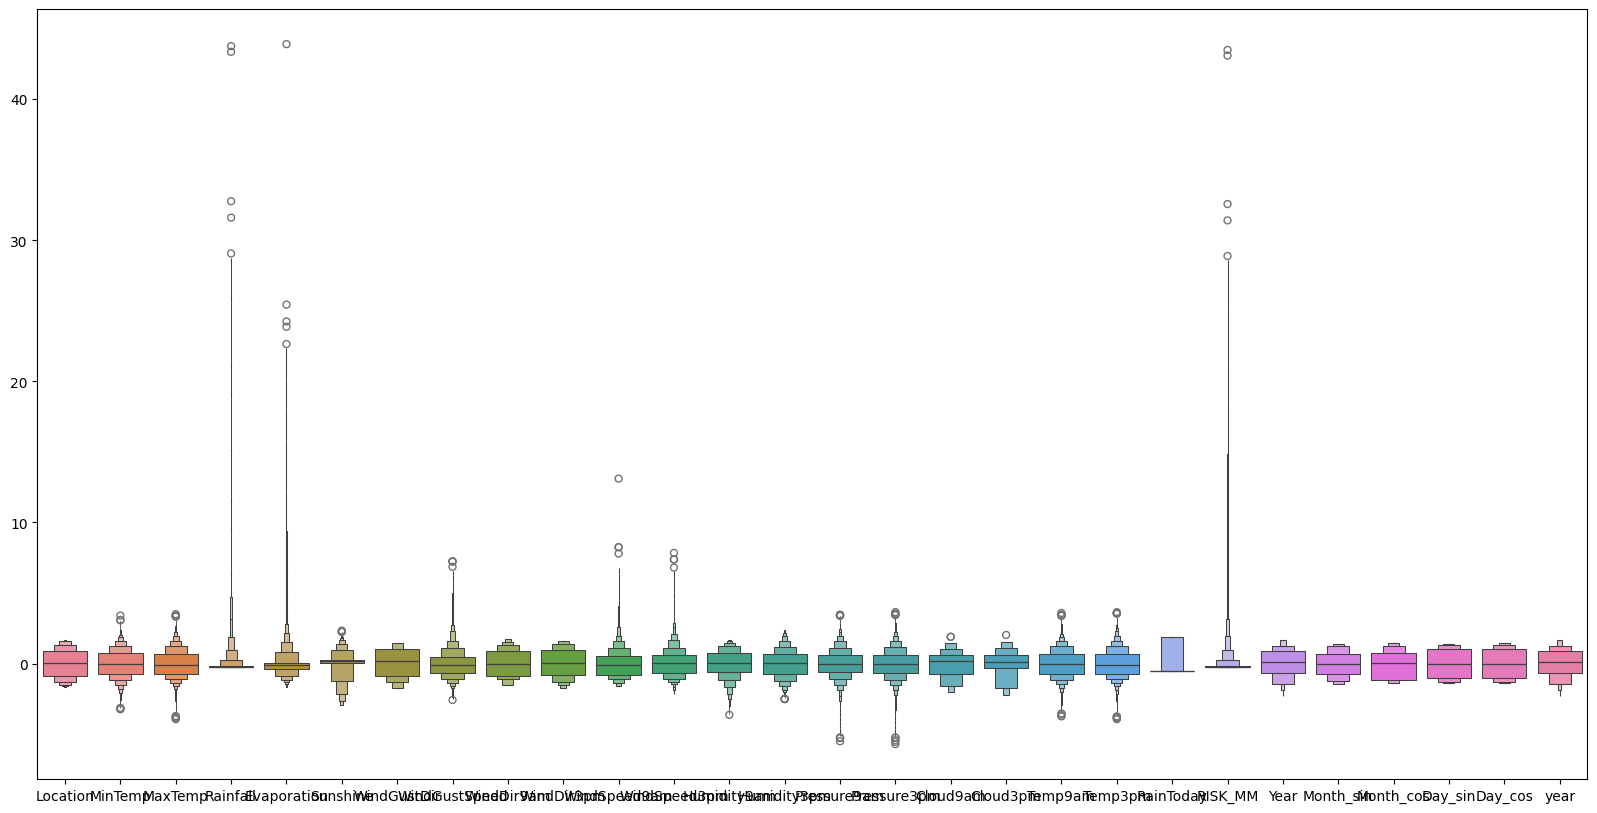

In [34]:
# Detect the outlier

# show scaled values
plt.figure(figsize=(20, 10))

sns.boxenplot(data=features)
plt.show()

In [42]:
# full data
# show scaled values
target = features['RainTomorrow']
features.head()

KeyError: 'RainTomorrow'

In [43]:
# Check for existence
if 'RainTomorrow' in features.columns:
  target = features['RainTomorrow']
else:
  print("RainTomorrow column not found!")

# Access by index (assuming it's the 2nd column)
if features.shape[1] >= 2:  # Check for at least 2 columns
  target = features.iloc[:, 1]
else:
  print("Not enough columns in features")

# Access with default value
target = features.get('RainTomorrow', None)

RainTomorrow column not found!
